In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import random
from hu import render

### Load dataset and results from first experiments
The dataset contains the index in the original imdb dataset, the text, the tokenized texts, the
input ids and the label. It consists of 1000 observations.
The results contain the index in the original imdb dataset, the attribution values of the
attribution method on that observation and the TPN/TPS of these attributions.
As Model Distilbert is used. Before saving, it was optimized and quantized for faster inference.
For a performance comparison see notebooks/run_distilbert_full_vs_quantized.ipynb.

In [2]:
with open("../data/imdb-distilbert-1000.json", "r") as fp:
    dataset = json.load(fp)

with open("../data/random.json", "r") as fp:
    random_results = json.load(fp)

with open("../data/lig.json", "r") as fp:
    lig_results = json.load(fp)

with open("../data/feature-ablation.json", "r") as fp:
    fa_results = json.load(fp)

with open("../data/tpn_hillclimber.json", "r") as fp:
    hc_tpn_results = json.load(fp)

with open("../data/tps_hillclimber.json", "r") as fp:
    hc_tps_results = json.load(fp)

In [3]:
def extract_tpn(results):
    return zip(*[(res['tpn'], res['tps']) for res in results])


random_tpn, random_tps = extract_tpn(random_results)
lig_tpn, lig_tps = extract_tpn(lig_results)
fa_tpn, fa_tps = extract_tpn(fa_results)
hc_tpn_tpn, hc_tpn_tps = extract_tpn(hc_tpn_results)
hc_tps_tpn, hc_tps_tps = extract_tpn(hc_tps_results)

In [4]:
table = PrettyTable(["Method", 'mean(TPN)', 'mean(TPS)', 'TPN Acc.', 'TPS Acc.'])
display_names = ("Random", "LIG", 'FA', 'HC(tpn)','HC(tps)')
# count how many times each method is better than the random baseline
for (method_result_tpn, method_result_tps), name in zip(
        ((random_tpn, random_tps),(lig_tpn, lig_tps), (fa_tpn, fa_tps), (hc_tpn_tpn, hc_tpn_tps), (hc_tps_tpn, hc_tps_tps))
         , display_names):

    random_tpn_array = np.array(random_tpn)
    random_tps_array = np.array(random_tps)
    method_result_tpn = np.array(method_result_tpn)
    method_result_tps = np.array(method_result_tps)
    method_result_tpn = method_result_tpn[method_result_tpn != np.array(None)]
    method_result_tps = method_result_tps[method_result_tps != np.array(None)]

    random_tpn_array = random_tpn_array[method_result_tpn != np.array(None)]
    random_tps_array = random_tps_array[method_result_tps != np.array(None)]

    tpn_mean = np.mean(method_result_tpn)
    tps_mean = np.mean(method_result_tps)

    tpn_acc = np.sum(method_result_tpn < random_tpn_array)/len(random_tpn_array) if len(random_tpn_array) else np.nan
    tps_acc = np.sum(method_result_tps < random_tps_array)/len(random_tps_array) if len(random_tps_array) else np.nan

    table.add_row([name, round(tpn_mean,3), round(tps_mean, 3), tpn_acc, tps_acc])

print(table)

+---------+-----------+-----------+----------+----------+
|  Method | mean(TPN) | mean(TPS) | TPN Acc. | TPS Acc. |
+---------+-----------+-----------+----------+----------+
|  Random |   0.221   |   0.484   |   0.0    |   0.0    |
|   LIG   |   0.119   |    0.15   |  0.808   |  0.962   |
|    FA   |   0.257   |   0.418   |   0.34   |  0.653   |
| HC(tpn) |   0.079   |   0.459   |  0.976   |  0.563   |
| HC(tps) |    nan    |    nan    |   nan    |   nan    |
+---------+-----------+-----------+----------+----------+


/home/tim/.cache/pypoetry/virtualenvs/best-attributions-KSHz0FDa-py3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tim/.cache/pypoetry/virtualenvs/best-attributions-KSHz0FDa-py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:191: RuntimeWarning: invalid value encountered in long_scalars
  ret = ret / rcount


Note: HC(tps) produced many negative attribution values such that the TPN or TPS could not be calculated. In the analysis above, the random attribution values
are not considered if the score of the other method is not available.

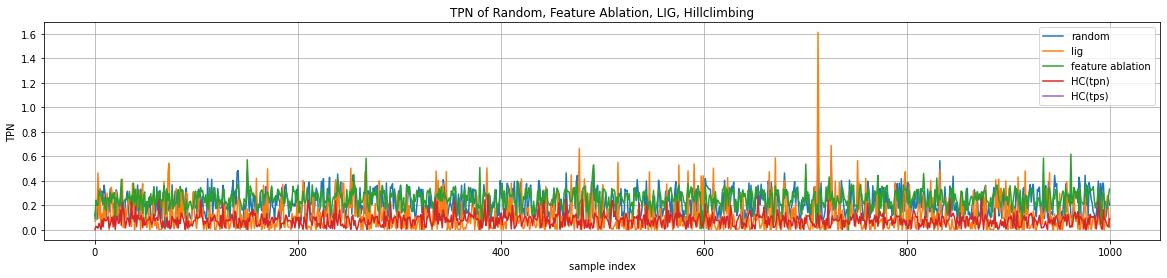

In [5]:
# plot TPN
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(random_tpn, label='random')
ax.plot(lig_tpn, label='lig')
ax.plot(fa_tpn, label='feature ablation')
ax.plot(hc_tpn_tpn, label='HC(tpn)')
ax.plot(hc_tps_tpn, label='HC(tps)')

ax.set(xlabel='sample index', ylabel='TPN',
       title='TPN of Random, Feature Ablation, LIG, Hillclimbing')
ax.grid()
ax.legend()

plt.show()


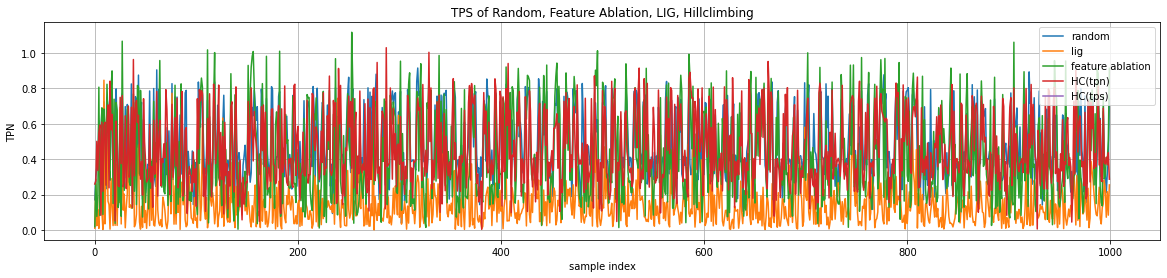

In [6]:
# plot TPS
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(random_tps, label='random')
ax.plot(lig_tps, label='lig')
ax.plot(fa_tps, label='feature ablation')
ax.plot(hc_tpn_tps, label='HC(tpn)')
ax.plot(hc_tps_tps, label='HC(tps)')

ax.set(xlabel='sample index', ylabel='TPN',
       title='TPS of Random, Feature Ablation, LIG, Hillclimbing')
ax.grid()
ax.legend()

plt.show()


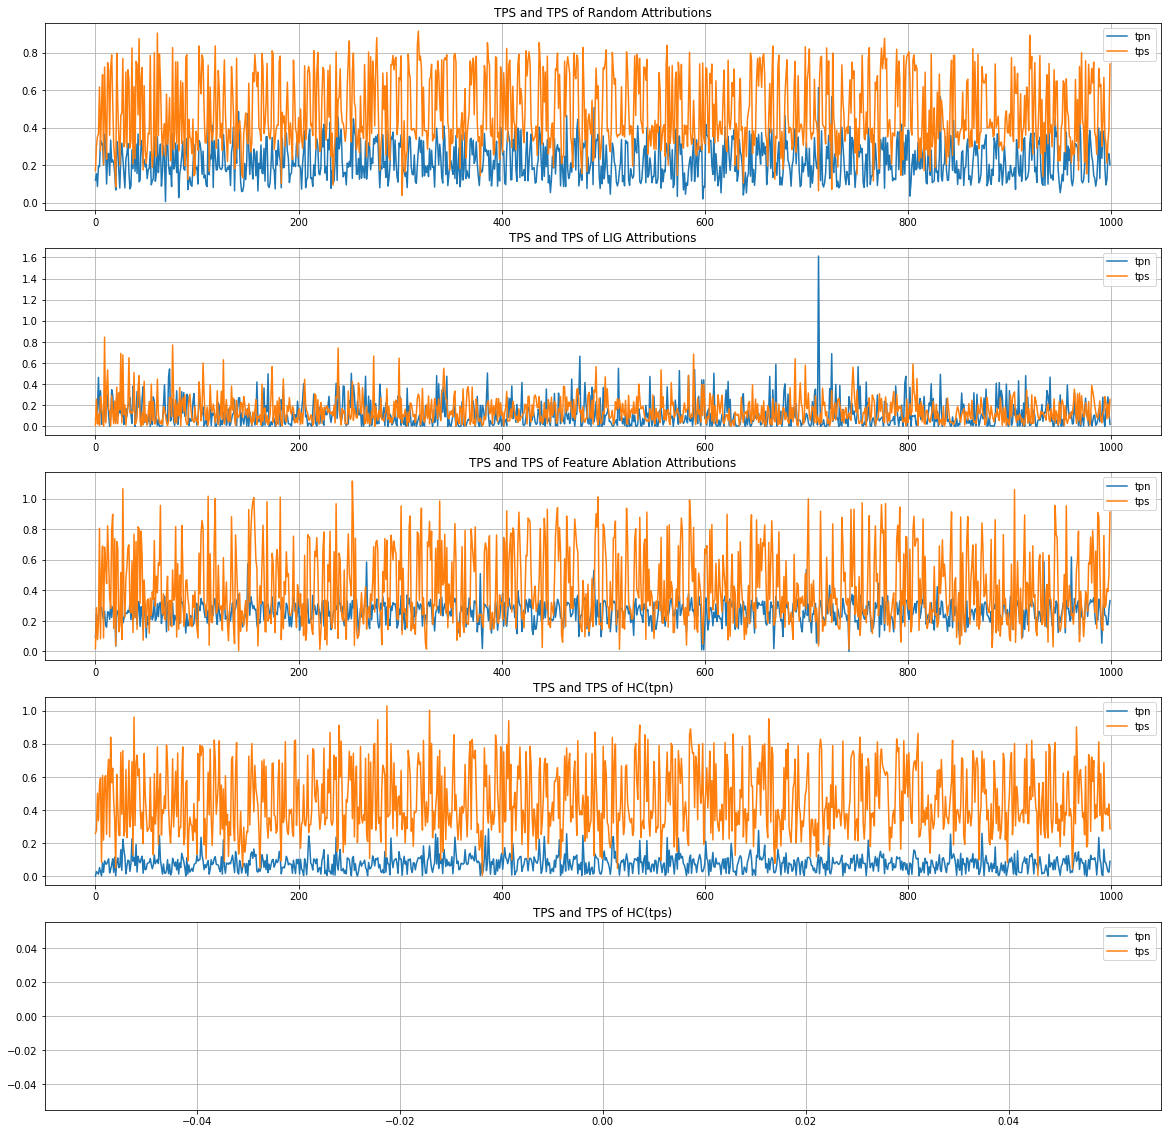

In [7]:
plt.close()
# plot TPN and TPS of each method
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(figsize=(20,4*5), nrows=5, ncols=1)
ax1.plot(random_tpn, label='tpn')
ax1.plot(random_tps, label='tps')
ax1.set(title='TPS and TPS of Random Attributions')
ax1.grid()
ax1.legend()

ax2.plot(lig_tpn, label='tpn')
ax2.plot(lig_tps, label='tps')
ax2.set(title='TPS and TPS of LIG Attributions')
ax2.grid()
ax2.legend()

ax3.plot(fa_tpn, label='tpn')
ax3.plot(fa_tps, label='tps')
ax3.set(title='TPS and TPS of Feature Ablation Attributions')
ax3.grid()
ax3.legend()

ax4.plot(hc_tpn_tpn, label='tpn')
ax4.plot(hc_tpn_tps, label='tps')
ax4.set(title='TPS and TPS of HC(tpn)')
ax4.grid()
ax4.legend()

ax5.plot(hc_tps_tpn, label='tpn')
ax5.plot(hc_tps_tps, label='tps')
ax5.set(title='TPS and TPS of HC(tps)')
ax5.grid()
ax5.legend()

plt.show()

### Insights:
* Hillclimbing(TPN) is producing attribution values maximizing the TPN score. In the diagram one can see that attribution values with a low TPN also have a high TPS.
* For the attribution values generated by Layer Integrated Gradients and Feature Ablation this seems to not be the case

### Now we look at some individual examples

['[CLS]', 'read', 'the', 'book', ',', 'forget', 'the', 'movie', '!', '[SEP]']


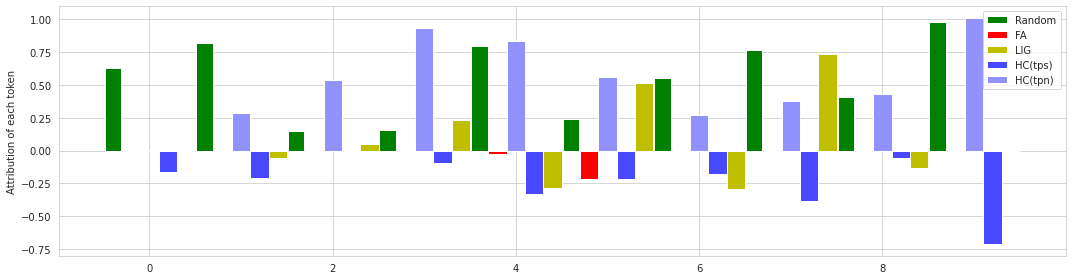

['[CLS]', 'what', 'a', 'script', ',', 'what', 'a', 'story', ',', 'what', 'a', 'mess', '!', '[SEP]']


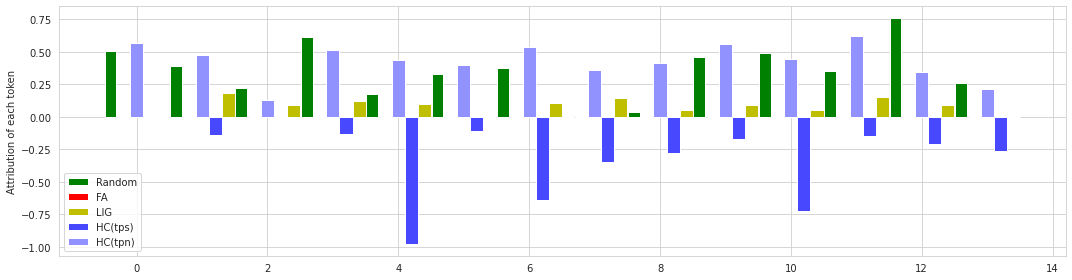

['[CLS]', 'i', 'hope', 'this', 'group', 'of', 'film', '-', 'makers', 'never', 're', '-', 'unite', '##s', '.', '[SEP]']


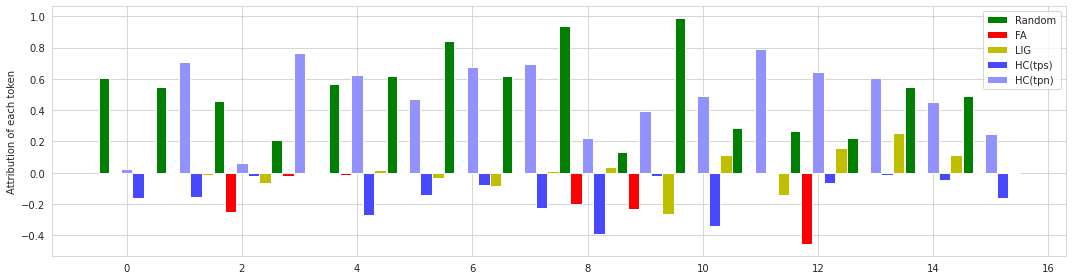

['[CLS]', 'primary', 'plot', '!', 'primary', 'direction', '!', 'poor', 'interpretation', '.', '[SEP]']


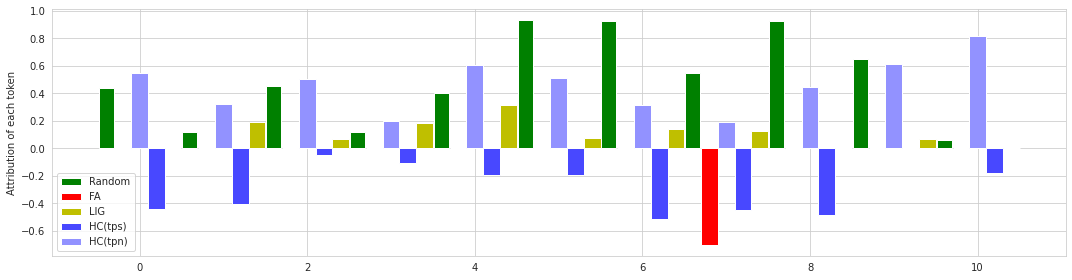

['[CLS]', 'more', 'suspense', '##ful', ',', 'more', 'subtle', ',', 'much', ',', 'much', 'more', 'disturbing', '.', '.', '.', '.', '[SEP]']


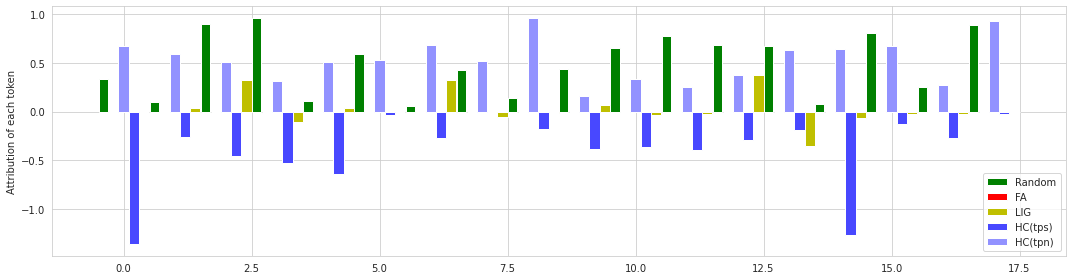

['[CLS]', 'this', 'is', 'a', 'great', 'movie', '.', 'too', 'bad', 'it', 'is', 'not', 'available', 'on', 'home', 'video', '.', '[SEP]']


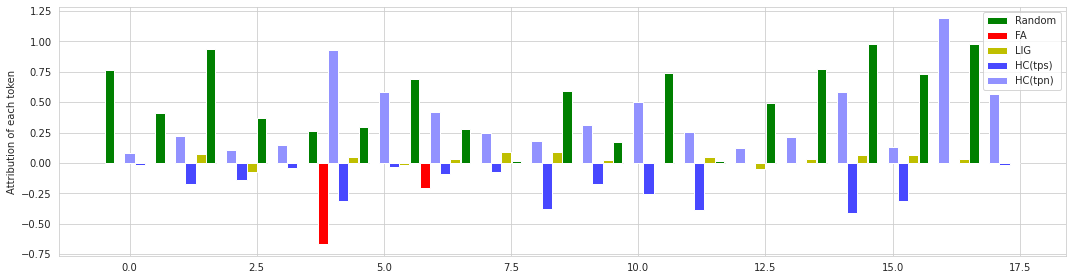

['[CLS]', 'brilliant', 'and', 'moving', 'performances', 'by', 'tom', 'court', '##enay', 'and', 'peter', 'finch', '.', '[SEP]']


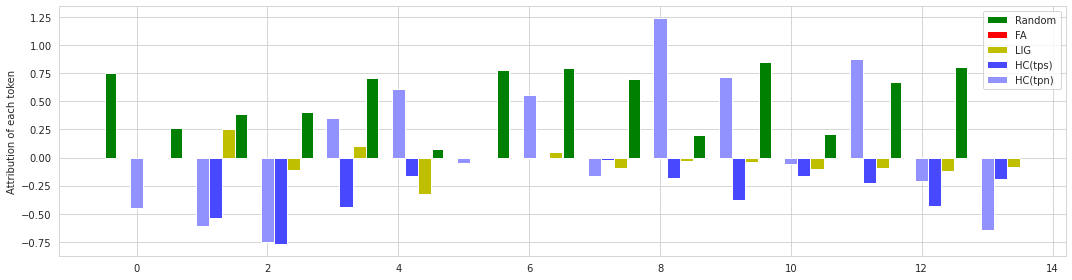

['[CLS]', 'just', 'love', 'the', 'inter', '##play', 'between', 'two', 'great', 'characters', 'of', 'stage', '&', 'screen', '-', 've', '##id', '##t', '&', 'barry', '##more', '[SEP]']


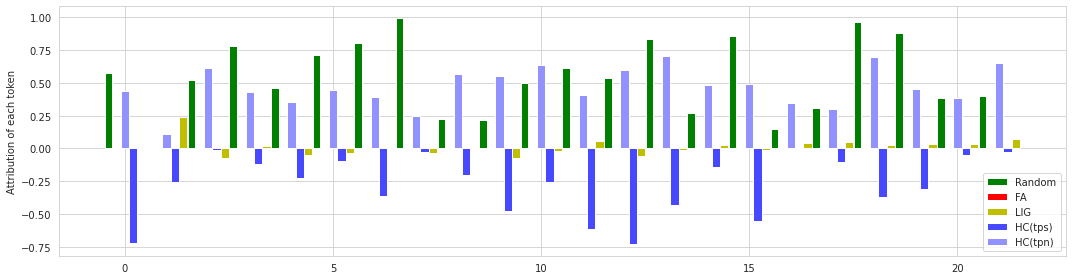

['[CLS]', 'this', 'is', 'a', 'good', 'film', '.', 'this', 'is', 'very', 'funny', '.', 'yet', 'after', 'this', 'film', 'there', 'were', 'no', 'good', 'ernest', 'films', '!', '[SEP]']


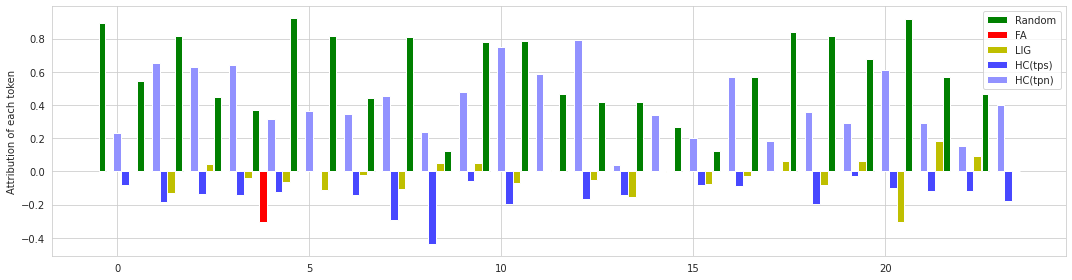

['[CLS]', 'add', 'this', 'little', 'gem', 'to', 'your', 'list', 'of', 'holiday', 'regulars', '.', 'it', 'is', '<', 'br', '/', '>', '<', 'br', '/', '>', 'sweet', ',', 'funny', ',', 'and', 'end', '##earing', '[SEP]']


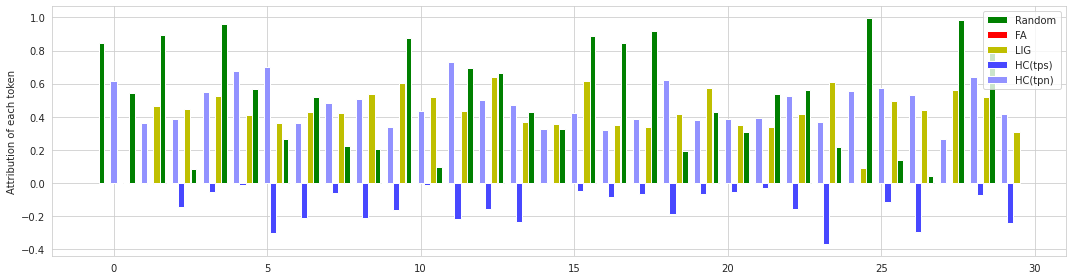

['[CLS]', 'if', 'you', 'like', 'paul', '##y', 'shore', ',', 'you', "'", 'll', 'love', 'son', 'in', 'law', '.', 'if', 'you', 'hate', 'paul', '##y', 'shore', ',', 'then', ',', 'well', '.', '.', '.', 'i', 'liked', 'it', '!', '[SEP]']


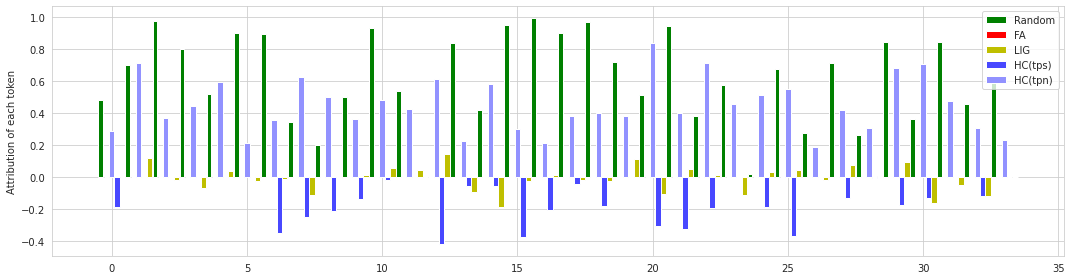

['[CLS]', 'hated', 'it', 'with', 'all', 'my', 'being', '.', 'worst', 'movie', 'ever', '.', 'mentally', '-', 'scarred', '.', 'help', 'me', '.', 'it', 'was', 'that', 'bad', '.', 'trust', 'me', '!', '!', '!', '[SEP]']


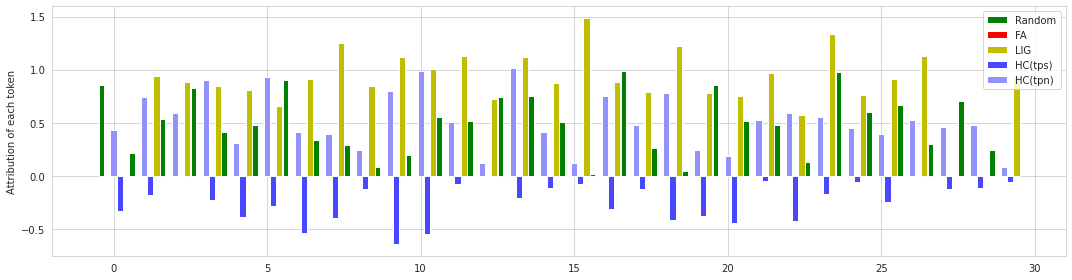

['[CLS]', 'a', 'touching', 'movie', '.', 'it', 'is', 'full', 'of', 'emotions', 'and', 'wonderful', 'acting', '.', 'i', 'could', 'have', 'sat', 'through', 'it', 'a', 'second', 'time', '.', '[SEP]']


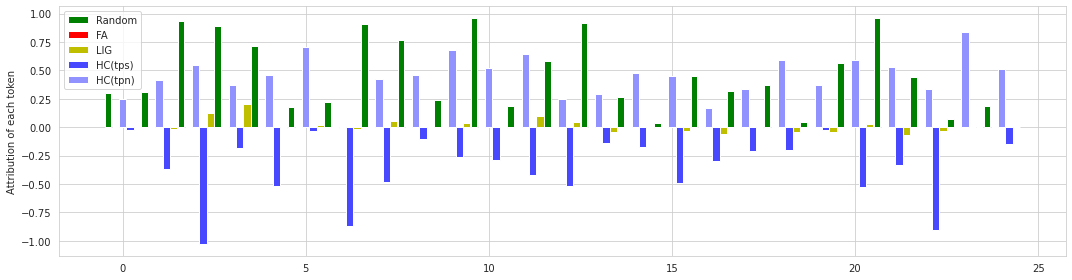

['[CLS]', 'a', 'me', '##sm', '##eri', '##zing', 'film', 'that', 'certainly', 'keeps', 'your', 'attention', '.', '.', '.', 'ben', 'daniels', 'is', 'fascinating', '(', 'and', 'courageous', ')', 'to', 'watch', '.', '[SEP]']


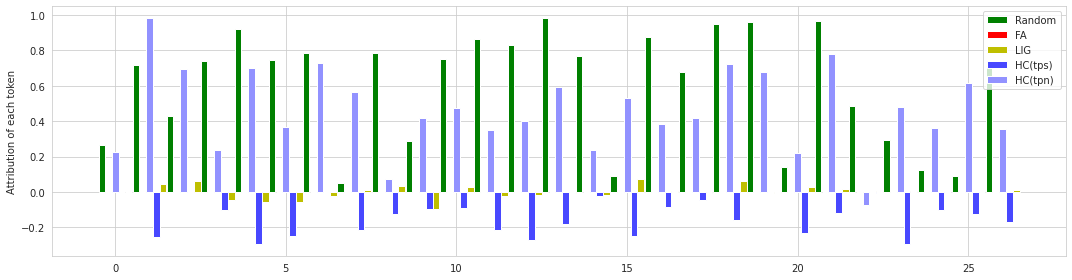

['[CLS]', 'this', 'is', 'a', 'terrible', 'movie', ',', 'don', "'", 't', 'waste', 'your', 'money', 'on', 'it', '.', 'don', "'", 't', 'even', 'watch', 'it', 'for', 'free', '.', 'that', "'", 's', 'all', 'i', 'have', 'to', 'say', '.', '[SEP]']


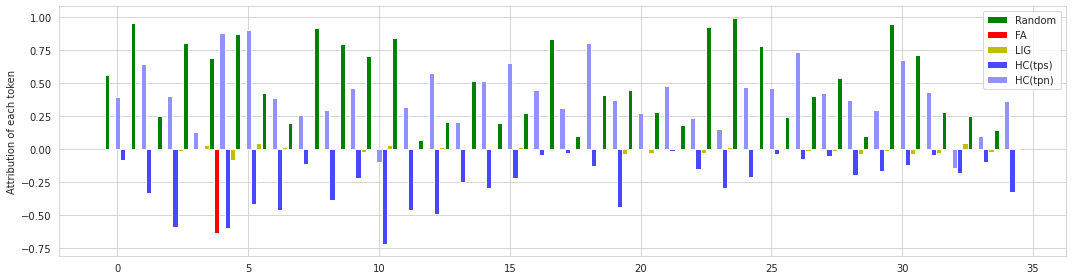

['[CLS]', 'this', 'is', 'the', 'greatest', 'movie', 'ever', '.', 'if', 'you', 'have', 'written', 'it', 'off', 'with', 'out', 'ever', 'seeing', 'it', '.', 'you', 'must', 'give', 'it', 'a', 'second', 'try', '.', '[SEP]']


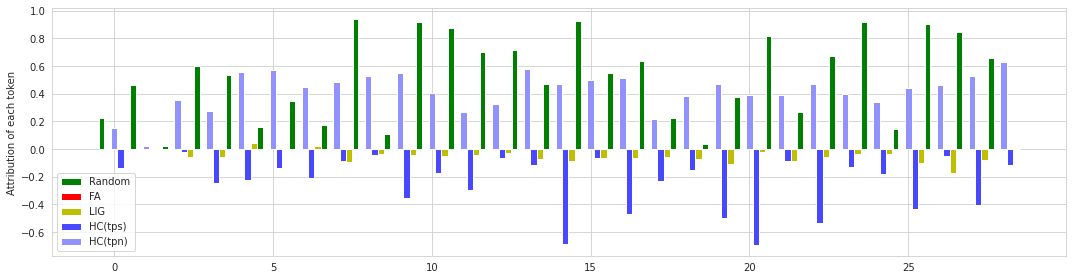

['[CLS]', 'without', 'a', 'doubt', ',', 'one', 'of', 'to', '##be', 'hop', '##por', "'", 's', 'best', '!', 'epic', 'story', '##tell', '##ng', ',', 'great', 'special', 'effects', ',', 'and', 'the', 'space', '##girl', '(', 'vamp', 'me', 'baby', '!', ')', '.', '[SEP]']


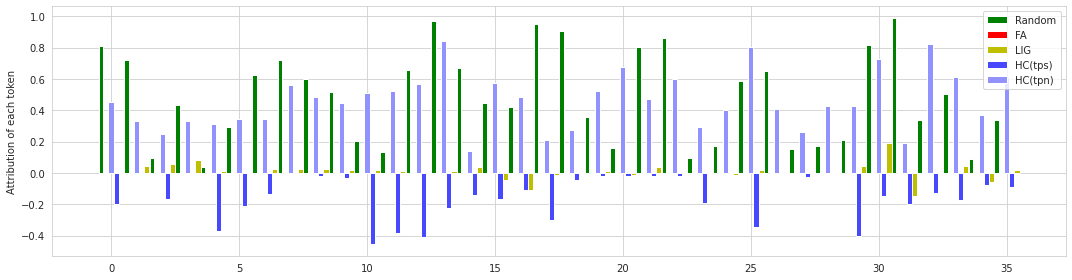

['[CLS]', 'absolutely', 'fantastic', '!', 'whatever', 'i', 'say', 'wouldn', "'", 't', 'do', 'this', 'under', '##rated', 'movie', 'the', 'justice', 'it', 'deserves', '.', 'watch', 'it', 'now', '!', 'fantastic', '!', '[SEP]']


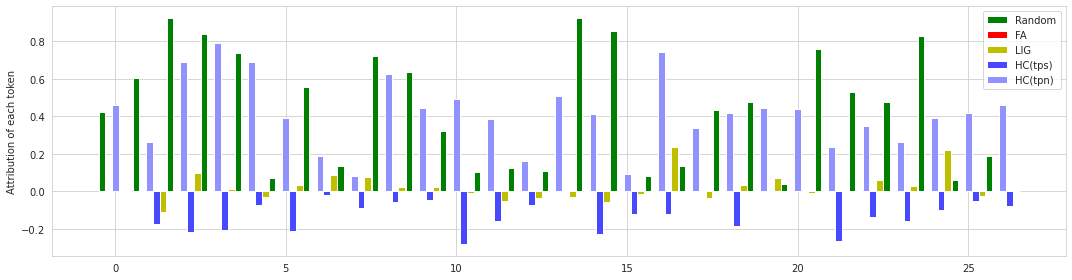

['[CLS]', 'for', 'pure', 'gothic', 'vampire', 'cheese', 'nothing', 'can', 'compare', 'to', 'the', 'subspecies', 'films', '.', 'i', 'highly', 'recommend', 'each', 'and', 'every', 'one', 'of', 'them', '.', '[SEP]']


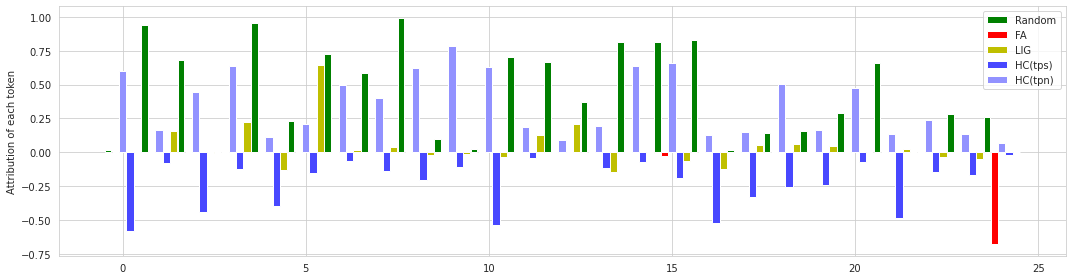

['[CLS]', 'if', 'you', "'", 've', 'ever', 'had', 'a', 'mad', 'week', '-', 'end', 'out', 'with', 'your', 'mates', 'then', 'you', "'", 'll', 'appreciate', 'this', 'film', '.', 'excellent', 'fun', 'and', 'a', 'laugh', 'a', 'minute', '.', '[SEP]']


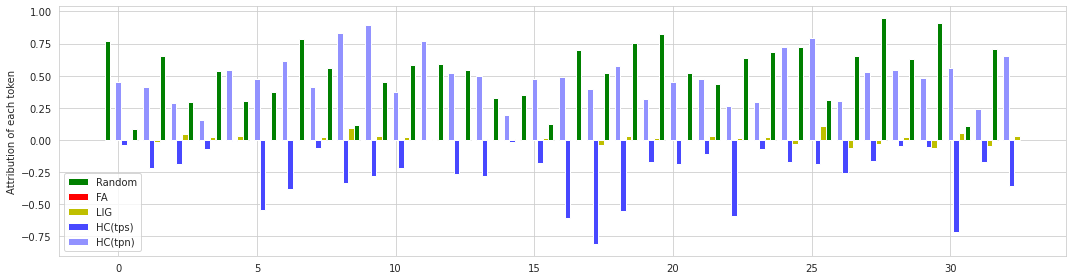

In [62]:
for i,sample in enumerate(dataset[:20]):
    fig, ax = plt.subplots(figsize=(15,4))
    tokens = sample['tokens']
    random_attr = random_results[i]['attribution_values']
    fa_attr = fa_results[i]['attribution_values']
    lig_attr = lig_results[i]['attribution_values']
    hc_tps_attr = hc_tps_results[i]['attribution_values']
    hc_tpn_attr = hc_tpn_results[i]['attribution_values']
    x = np.arange(len(tokens))  # the label locations
    width = 0.2  # the width of the bars
    r1 = ax.bar(x=x - 2*(width), height=random_attr, width=width *.9, label='Random',color='g')
    r2 = ax.bar(x=x - width, height=fa_attr, width=width, label='FA', color='r')
    r3 = ax.bar(x=x + 2*(width), height=lig_attr, width=width, label='LIG', color='y')
    r4 = ax.bar(x=x + width, height=hc_tps_attr, width=width, label='HC(tps)')
    r5 = ax.bar(x=x , height=hc_tpn_attr, width=width, label='HC(tpn)')
    ax.set_ylabel('Attribution of each token')
    ax.legend()

    #ax.bar_label(r1, padding=3)
    #ax.bar_label(r2, padding=3)

    fig.tight_layout()
    print(tokens)
    plt.show()